# SHAHID ALI

### Email Spam Detection

### Importing all necessary Librarries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
from sklearn.model_selection import train_test_split

### Read the CSV file and display first 5 rows

In [5]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
265,ham,Same. Wana plan a trip sometme then,NaN,NaN,NaN
3829,ham,I agree. So i can stop thinkin about ipad. Can...,NaN,NaN,NaN
858,ham,Spoons it is then okay?,NaN,NaN,NaN
1305,ham,Designation is software developer and may be s...,NaN,NaN,NaN
3900,ham,That depends. How would you like to be treated...,NaN,NaN,NaN


### Checking The shape of the Data

In [7]:
df.shape

(5572, 5)

In [8]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement

## 1. Data Cleaning

#### Cheking Information of data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.sample(5)

,v1,v2
1618,ham,The 2 oz guy is being kinda flaky but one frie...
5052,ham,Lmao you know me so well...
5116,ham,Thanks. Fills me with complete calm and reassu...
1908,ham,Hello beautiful r u ok? I've kinda ad a row wi...
2852,ham,I doubt you could handle 5 times per night in ...


In [12]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
514,spam,"You are guaranteed the latest Nokia Phone, a 4..."
1122,ham,Ok.ok ok..then..whats ur todays plan
1604,ham,"God picked up a flower and dippeditinaDEW, lov..."
5224,ham,\OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE ...
3124,spam,1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

403

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

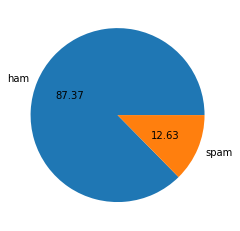

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
#!pip install nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shahidali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [37]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

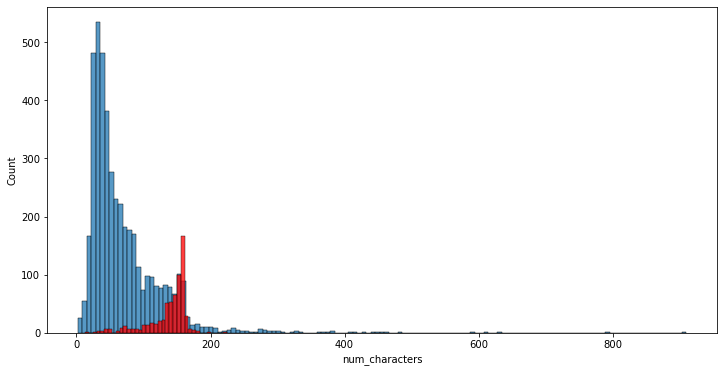

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

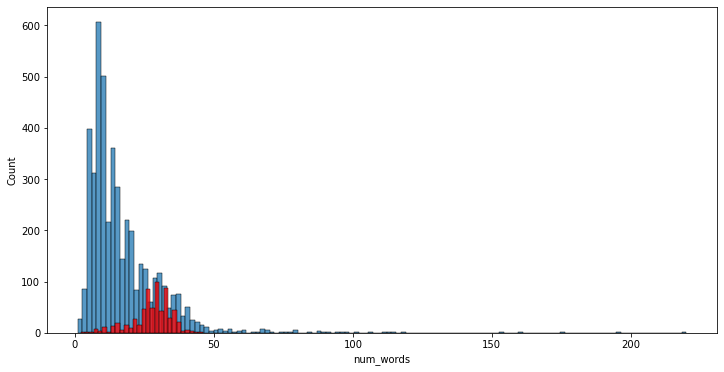

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

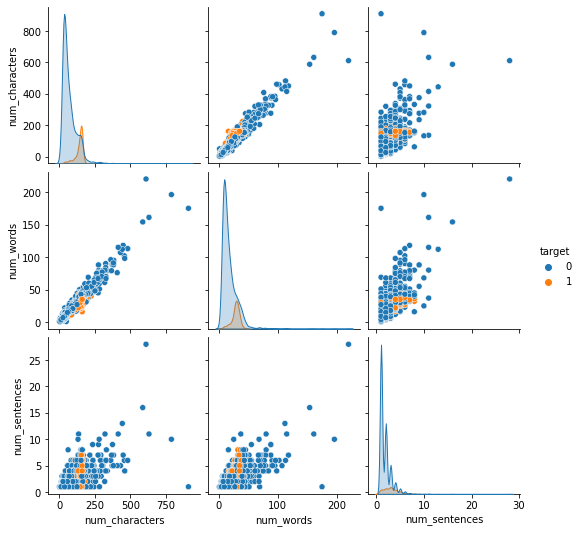

In [40]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

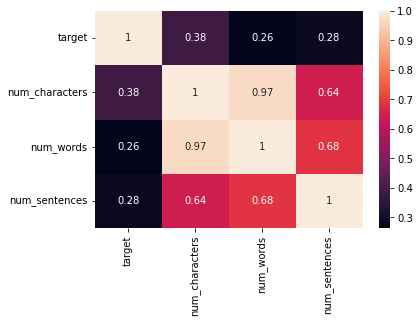

In [41]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [42]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    y = []
    stop_words = set(stopwords.words('english'))
    
    for word in text.split():
        if word.lower() not in stop_words and word.lower() not in string.punctuation:
            y.append(word.lower())
    
    return y

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

["i'm", 'gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight,', 'k?', "i've", 'cried', 'enough', 'today.']


In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., available, bugis..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joking, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor..., u, c, already, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf,, lives, around, though]"


In [47]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

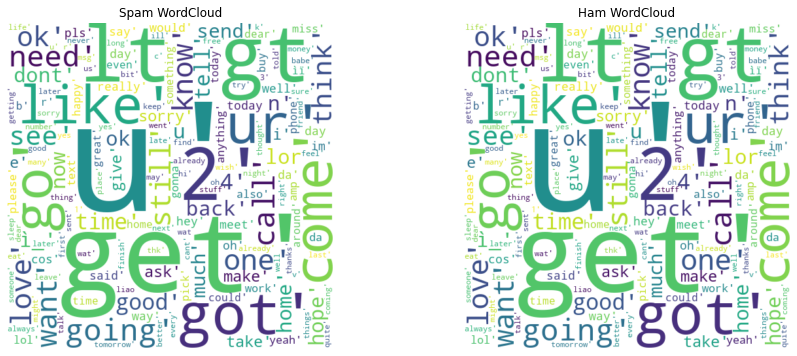

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Convert non-string values to strings before generating WordCloud
spam_text = df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" ")
ham_text = df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep=" ")

# Generate WordClouds
spam_wc = wc.generate(spam_text)
ham_wc = wc.generate(ham_text)

# Plot WordClouds
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham WordCloud')
plt.axis('off')

plt.show()


In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., available, bugis..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joking, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor..., u, c, already, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf,, lives, around, though]"


In [50]:
spam_corpus = []
for msg_list in df[df['target'] == 1]['transformed_text'].tolist():
    msg = ' '.join(msg_list)  # Convert list to string
    for word in msg.split():
        spam_corpus.append(word)


In [51]:
len(spam_corpus)

11075

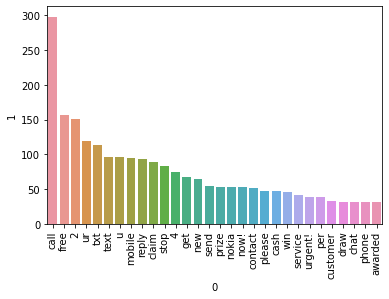

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg_list in df[df['target'] == 0]['transformed_text'].tolist():
    msg = ' '.join(msg_list)  # Convert list to string
    for word in msg.split():
        spam_corpus.append(word)


In [54]:
len(ham_corpus)

0

In [55]:
'''from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()   '''

"from collections import Counter\nsns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])\nplt.xticks(rotation='vertical')\nplt.show()   "

In [56]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., available, bugis..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joking, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor..., u, c, already, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf,, lives, around, though]"


## 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instantiate the vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Concatenate the list of strings into a single string
corpus = df['transformed_text'].str.join(" ")

# Fit and transform the vectorizer on the concatenated string
X = tfidf.fit_transform(corpus).toarray()


In [59]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [60]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score ",accuracy_score(y_test,y_pred1))
print(" ")
print("Confusion Matrix ")
print(confusion_matrix(y_test,y_pred1))
print(" ")

print("Precision Score ",precision_score(y_test,y_pred1))

Accuracy Score  0.8965183752417795
 
Confusion Matrix 
[[809  87]
 [ 20 118]]
 
Precision Score  0.5756097560975609


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score ",accuracy_score(y_test,y_pred2))
print(" ")

print("Confusion Matrix ")

print(confusion_matrix(y_test,y_pred2))
print(" ")

print("Precision Score ",precision_score(y_test,y_pred2))

Accuracy Score  0.9796905222437138
 
Confusion Matrix 
[[896   0]
 [ 21 117]]
 
Precision Score  1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score ",accuracy_score(y_test,y_pred3))
print(" ")

print("Confusion Matrix ")

print(confusion_matrix(y_test,y_pred3))
print(" ")

print("Precision Score ",precision_score(y_test,y_pred3))

Accuracy Score  0.9874274661508704
 
Confusion Matrix 
[[896   0]
 [ 13 125]]
 
Precision Score  1.0


In [70]:
# tfidf --> MNB

In [71]:
#pip install xgboost

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KNN' : knc, 
    'Naive Bayes': mnb, 
    'Decision Tree': dtc, 
    'Logestic Regression': lrc, 
    'Random Forest': rfc, 
    'AdaBoost': abc, 
    'Bagging classifier': bc, 
    'Extra Trees Classifier': etc,
    'Gradient Boosting Classifier':gbdt,
    'XGBoosting Classifier':xgb
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [76]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9754098360655737)

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name," Algorithm ")
    print("  ")

    print("Accuracy is  : ",current_accuracy)
    print("Precision is : ",current_precision)
    print("  ")
    print("  ")
    print("-----------------------------------")
    print("  ")


    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC  Algorithm 
  
Accuracy is  :  0.9787234042553191
Precision is :  0.9754098360655737
  
  
-----------------------------------
  
For  KNN  Algorithm 
  
Accuracy is  :  0.9052224371373307
Precision is :  1.0
  
  
-----------------------------------
  
For  Naive Bayes  Algorithm 
  
Accuracy is  :  0.9796905222437138
Precision is :  1.0
  
  
-----------------------------------
  
For  Decision Tree  Algorithm 
  
Accuracy is  :  0.941972920696325
Precision is :  0.8679245283018868
  
  
-----------------------------------
  
For  Logestic Regression  Algorithm 
  
Accuracy is  :  0.9545454545454546
Precision is :  0.9504950495049505
  
  
-----------------------------------
  
For  Random Forest  Algorithm 
  
Accuracy is  :  0.9748549323017408
Precision is :  0.9912280701754386
  
  
-----------------------------------
  
For  AdaBoost  Algorithm 
  
Accuracy is  :  0.9758220502901354
Precision is :  0.9669421487603306
  
  
-----------------------------------
  
For  Bagg

In [78]:
import pandas as pd

# Assuming you have clfs, accuracy_scores, and precision_scores correctly defined

# Make sure there are no leading or trailing spaces in column names
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # 'Algorithm' instead of 'Algorithm '
    'Accuracy': accuracy_scores,  # 'Accuracy' instead of 'Accuracy '
    'Precision': precision_scores  # 'Precision' instead of 'Precision '
})

# Sort the DataFrame by 'Precision' column
performance_df = performance_df.sort_values('Precision', ascending=False)

# Print or further process performance_df
print(performance_df)


                       Algorithm  Accuracy  Precision
1                            KNN  0.905222   1.000000
2                    Naive Bayes  0.979691   1.000000
5                  Random Forest  0.974855   0.991228
8         Extra Trees Classifier  0.981625   0.983740
0                            SVC  0.978723   0.975410
6                       AdaBoost  0.975822   0.966942
10         XGBoosting Classifier  0.976789   0.959677
4            Logestic Regression  0.954545   0.950495
9   Gradient Boosting Classifier  0.950677   0.922330
3                  Decision Tree  0.941973   0.867925
7             Bagging classifier  0.957447   0.867188


In [79]:

# Make sure there are no leading or trailing spaces in column names
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # 'Algorithm' instead of 'Algorithm '
    'Accuracy': accuracy_scores,  # 'Accuracy' instead of 'Accuracy '
    'Precision': precision_scores  # 'Precision' instead of 'Precision '
})

# Sort the DataFrame by 'Precision' column
performance_df = performance_df.sort_values('Precision', ascending=False)



In [80]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.905222,1.000000
2,Naive Bayes,0.979691,1.000000
5,Random Forest,0.974855,0.991228
8,Extra Trees Classifier,0.981625,0.983740
0,SVC,0.978723,0.975410
6,AdaBoost,0.975822,0.966942
10,XGBoosting Classifier,0.976789,0.959677
4,Logestic Regression,0.954545,0.950495
9,Gradient Boosting Classifier,0.950677,0.922330
3,Decision Tree,0.941973,0.867925


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [82]:
performance_df1

,Algorithm,variable,value
0,KNN,Accuracy,0.905222
1,Naive Bayes,Accuracy,0.979691
2,Random Forest,Accuracy,0.974855
3,Extra Trees Classifier,Accuracy,0.981625
4,SVC,Accuracy,0.978723
5,AdaBoost,Accuracy,0.975822
6,XGBoosting Classifier,Accuracy,0.976789
7,Logestic Regression,Accuracy,0.954545
8,Gradient Boosting Classifier,Accuracy,0.950677
9,Decision Tree,Accuracy,0.941973


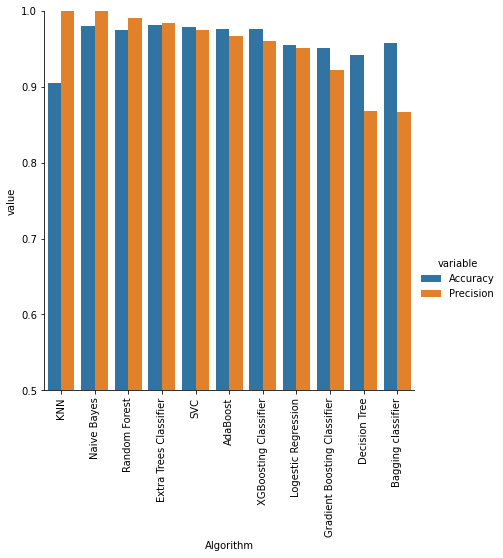

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=6)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [87]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [88]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [90]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,Naive Bayes,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000
2,Random Forest,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228
3,Extra Trees Classifier,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
4,SVC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
5,AdaBoost,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
6,XGBoosting Classifier,0.976789,0.959677,0.976789,0.959677,0.976789,0.959677,0.976789,0.959677
7,Logestic Regression,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495
8,Gradient Boosting Classifier,0.950677,0.922330,0.950677,0.922330,0.950677,0.922330,0.950677,0.922330
9,Decision Tree,0.941973,0.867925,0.941973,0.867925,0.941973,0.867925,0.941973,0.867925


In [91]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [92]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [93]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [94]:
y_pred = voting.predict(X_test)
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("Precision is : ",precision_score(y_test,y_pred))

Accuracy is :  0.9845261121856866
Precision is :  0.9841269841269841


In [95]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [98]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy  is : ",accuracy_score(y_test,y_pred))
print("Precision is : ",precision_score(y_test,y_pred))

Accuracy  is :  0.9816247582205029
Precision is :  0.9407407407407408


# Prediction

In [99]:
if (y_pred[0] == 1):
  print('This is a Spam Email')
else:
  print('This is not a Spam Email')

This is not a Spam Email


### Extracting the ML Model using Pickle

In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))